# npx-32 probe

author: steeve.laquitaine@epfl.ch  
date: 02.03.2023  
last modified: 17-07-2023  
regression: none  
status: OK  

## Setup 

Create and activate `npx_10m_384ch_unit_classes`

In [2]:
# SETUP PACKAGES
%load_ext autoreload
%autoreload 2
import os
import pandas as pd
from matplotlib import pyplot as plt
from probeinterface.plotting import plot_probe
from datetime import datetime

pd.set_option('display.max_colwidth', None)

# SET PATHS
PROJ_PATH = "/gpfs/bbp.cscs.ch/project/proj68/home/laquitai/cns_2023_on_git/"

os.chdir(PROJ_PATH)

from src.nodes.load import load_prep_recording
from src.nodes.truth.silico import ground_truth
from src.nodes.prepro import preprocess
from src.nodes.postpro import waveform
from src.nodes.utils import get_config, write_metadata

# SET PARAMETERS
EXPERIMENT = "silico_neuropixels"    # specifies the experiment 
SIMULATION_DATE = "2023_02_19"       # specifies the run (date)


# SETUP CONFIG
data_conf, param_conf = get_config(EXPERIMENT, SIMULATION_DATE).values()


# SET FIGURE PATHS
FIG_PATH = data_conf["figures"]["silico"]["probe"]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
2023-07-17 21:05:55,515 - root - utils.py - get_config - INFO - Reading experiment config.
2023-07-17 21:05:55,555 - root - utils.py - get_config - INFO - Reading experiment config. - done


### Plot neuropix-32 probe

In [5]:
# load the preprocessed recording
trace = load_prep_recording(data_conf)

# check contact coordinates
probe = trace.get_probe()

# report
print(probe)
print("Contact coordinates:")
probe.to_dataframe()

Probe - 32ch - 1shanks
Contact coordinates:


,x,y,z,contact_shapes,width,shank_ids,contact_ids
0,3546.780722,-1124.875591,-2929.841243,square,6.0,,0
1,3572.082365,-1133.098295,-2899.971292,square,6.0,,1
2,3597.384009,-1141.320999,-2870.101341,square,6.0,,2
3,3622.685652,-1149.543702,-2840.231390,square,6.0,,3
4,3647.987295,-1157.766406,-2810.361438,square,6.0,,4
5,3673.288939,-1165.989110,-2780.491487,square,6.0,,5
6,3698.590582,-1174.211814,-2750.621536,square,6.0,,6
7,3723.892225,-1182.434518,-2720.751585,square,6.0,,7
8,3749.193869,-1190.657222,-2690.881634,square,6.0,,8
9,3774.495512,-1198.879926,-2661.011682,square,6.0,,9


**Plot**

`Result: contact and device channels' mapping is correct`

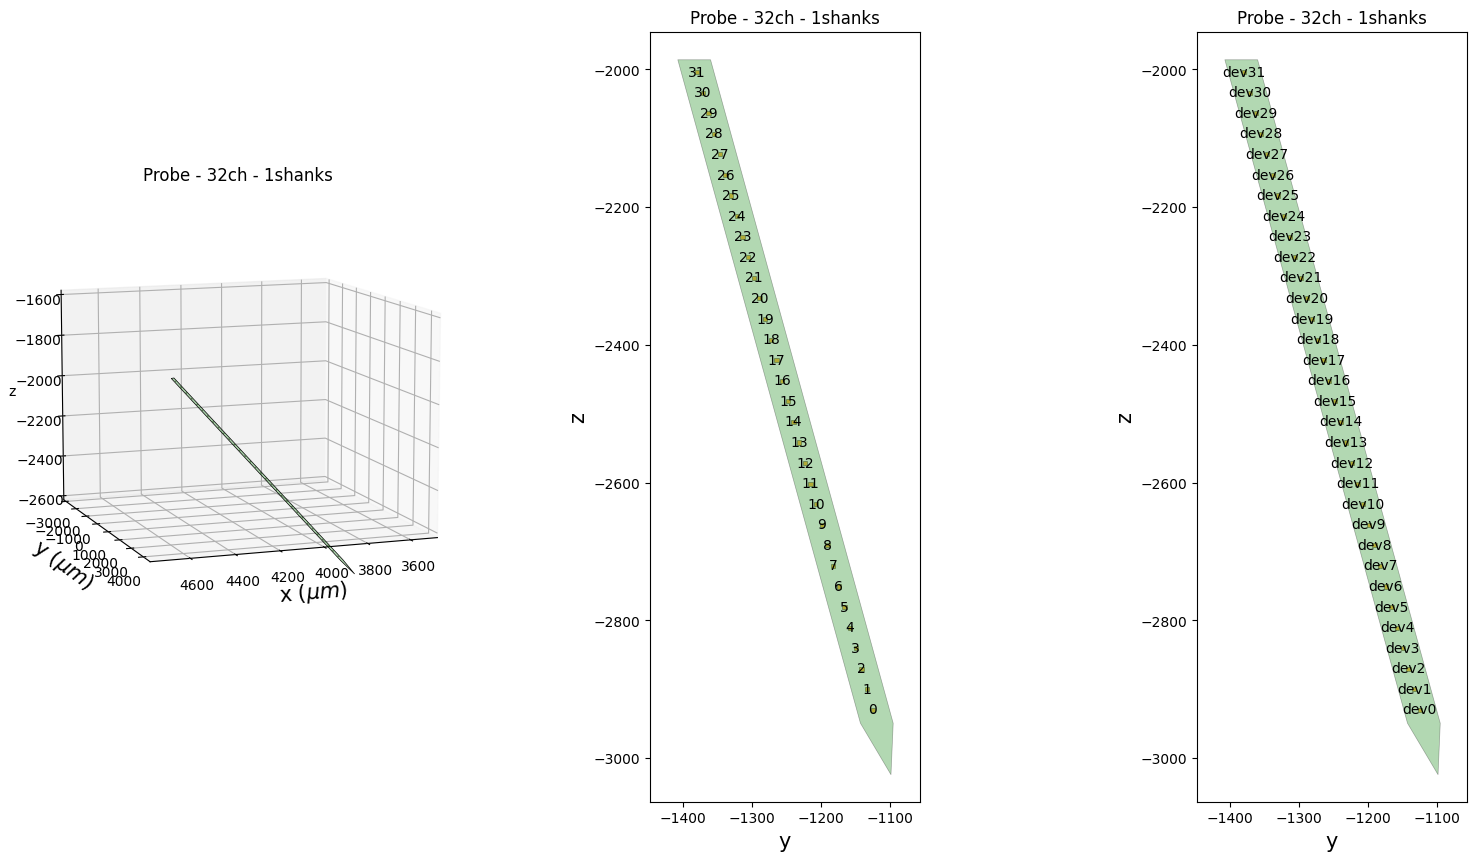

In [6]:
# View in contact channe locations in 3D
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(131, projection='3d')
ax.view_init(10, 70)
plot_probe(probe, ax=ax);
ax.set_xlim([3500, 4750]);
ax.set_zlim([-2600, -1600]);

# plot channel id on projection to the y-z 2D plan 
ax = fig.add_subplot(132)
plot_probe(probe.to_2d(axes='yz'), ax=ax, with_channel_index=True);
ax.set_xlabel("y");
ax.set_ylabel("z");

# plot channel id on the device
ax = fig.add_subplot(133)
plot_probe(probe.to_2d(axes='yz'), ax=ax, with_device_index=True);
ax.set_xlabel("y");
ax.set_ylabel("z");

### Write figure

In [6]:
# # save figure
# fig.savefig(FIG_PATH+".png")

# # write metadata
# metadata = {
#     "fig_path": FIG_PATH,
#     "creation_date": datetime.now().strftime("%d/%m/%Y %H:%M:%S"),
#     "simulation_date": SIMULATION_DATE,
#     "data_conf": data_conf,
#     "param_conf": param_conf,
#     }
# write_metadata(metadata, FIG_PATH)

# References

(1) https://probeinterface.readthedocs.io/en/stable/examples/ex_05_device_channel_indices.html 

(2) https://spikeinterface.readthedocs.io/en/latest/modules/core/plot_4_waveform_extractor.html 